<a href="https://colab.research.google.com/github/asheta66/Data-Mining-2/blob/main/SVM_Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SVM Performance on Breast Cancer Dataset:
    Kernel  Train Accuracy  Train Precision  Train Recall  Train F1  \
0   linear        0.962637         0.965398      0.975524  0.970435   
1      rbf        0.920879         0.905844      0.975524  0.939394   
2     poly        0.909890         0.891374      0.975524  0.931553   
3  sigmoid        0.459341         0.562500      0.629371  0.594059   

   Test Accuracy  Test Precision  Test Recall   Test F1  
0       0.964912        0.958904     0.985915  0.972222  
1       0.921053        0.897436     0.985915  0.939597  
2       0.921053        0.897436     0.985915  0.939597  
3       0.403509        0.519481     0.563380  0.540541  

Best kernel based on test accuracy: linear


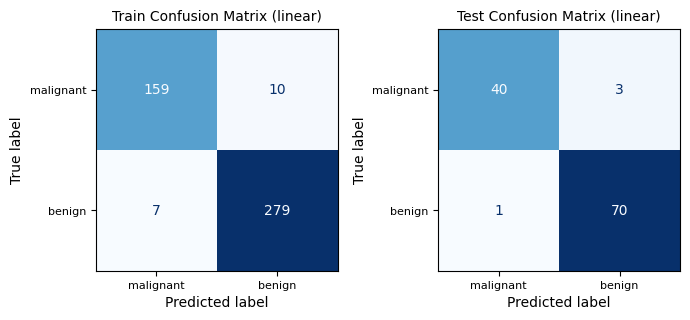

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Load data and convert to DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# --------------------------
# 2. Prepare Data
# --------------------------
X = df.drop(columns='target')
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Kernels to evaluate
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Store metrics and models
results = []
trained_models = {}

# --------------------------
# 3. Train & Evaluate Models
# --------------------------
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    trained_models[kernel] = model  # store for later use

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred)
    ]
    test_metrics = [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred)
    ]

    results.append({
        'Kernel': kernel,
        'Train Accuracy': train_metrics[0],
        'Train Precision': train_metrics[1],
        'Train Recall': train_metrics[2],
        'Train F1': train_metrics[3],
        'Test Accuracy': test_metrics[0],
        'Test Precision': test_metrics[1],
        'Test Recall': test_metrics[2],
        'Test F1': test_metrics[3]
    })

results_df = pd.DataFrame(results)
print("\nSVM Performance on Breast Cancer Dataset:")
print(results_df)

# --------------------------
# 4. Select Best Model
# --------------------------
best_kernel = results_df.sort_values(by='Test Accuracy', ascending=False).iloc[0]['Kernel']
print(f"\nBest kernel based on test accuracy: {best_kernel}")

# Get the best model
best_model = trained_models[best_kernel]

# Predict with best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

# --------------------------
# 5. Plot & Save Confusion Matrices
# --------------------------
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

cm_train = confusion_matrix(y_train, y_train_best)
cm_test = confusion_matrix(y_test, y_test_best)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=data.target_names)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=data.target_names)

disp_train.plot(ax=axs[0], cmap='Blues', colorbar=False, values_format='d')
axs[0].set_title(f"Train Confusion Matrix ({best_kernel})", fontsize=10)
axs[0].tick_params(labelsize=8)

disp_test.plot(ax=axs[1], cmap='Blues', colorbar=False, values_format='d')
axs[1].set_title(f"Test Confusion Matrix ({best_kernel})", fontsize=10)
axs[1].tick_params(labelsize=8)

plt.tight_layout()
plt.savefig("confusion_matrices.png", dpi=300)
plt.show()


In [ ]:
# Create a DataFrame of results
results_df = pd.DataFrame(results)
print("\nSVM Performance on Breast Cancer Dataset:")
results_df


SVM Performance on Breast Cancer Dataset:


,Kernel,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,linear,0.962637,0.965398,0.975524,0.970435,0.964912,0.958904,0.985915,0.972222
1,rbf,0.920879,0.905844,0.975524,0.939394,0.921053,0.897436,0.985915,0.939597
2,poly,0.909890,0.891374,0.975524,0.931553,0.921053,0.897436,0.985915,0.939597
3,sigmoid,0.459341,0.562500,0.629371,0.594059,0.403509,0.519481,0.563380,0.540541


In [ ]:
model

SVC(kernel='sigmoid')

**SHAP**

It stands for SHapley Additive exPlanations. This method aims to explain the prediction of an instance/observation by computing the contribution of each feature to the prediction, and it can be installed using the following pip command.

In [ ]:
# !pip install shap

  0%|          | 0/114 [00:00<?, ?it/s]

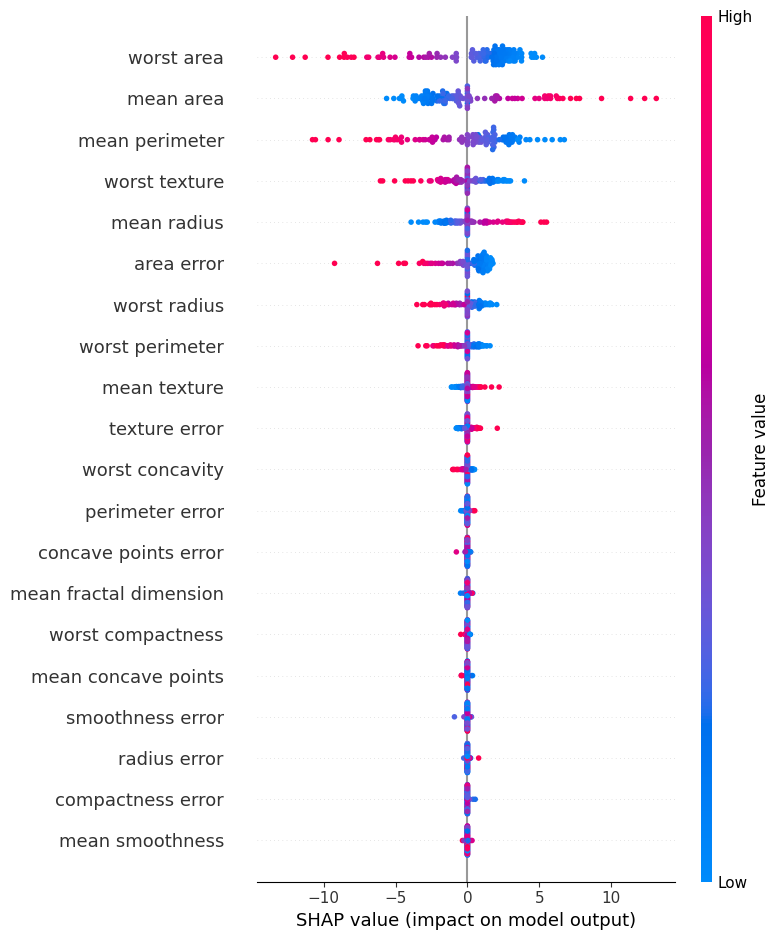

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Ensure the model is fitted and returns predicted probabilities (for classification)
if hasattr(best_model, "predict_proba"):
    model_predict_function = best_model.predict_proba
else:
    # If the model doesn't have predict_proba, use decision function (for SVM)
    model_predict_function = best_model.decision_function

# Use a small subset of the training data as background
X_background = shap.sample(X_train, 100, random_state=0)

# Define the SHAP explainer using the best_model's prediction function
explainer = shap.KernelExplainer(model_predict_function, X_background)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test, nsamples=100)

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Save the plot
plt.savefig("SHAP_values.png", dpi=300)

# Display the plot
plt.show()


**Dependence Plot**

Unlike summary plots, dependence plots show the relationship between a specific feature and the predicted outcome for each instance within the data. This analysis is performed for multiple reasons and is not limited to gaining more granular information and validating the importance of the feature being analyzed by confirming or challenging the findings from the summary plots or other global feature importance measures.

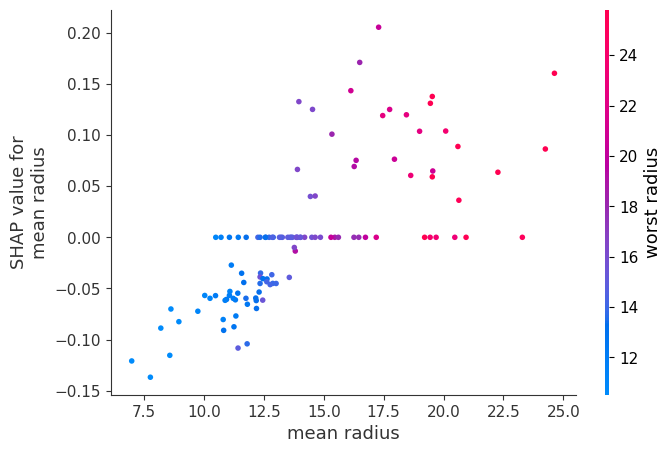

<Figure size 640x480 with 0 Axes>

In [ ]:
# Ensure feature names are passed correctly
feature_name = "mean radius"

# Draw the dependence plot
shap.dependence_plot(
    feature_name,
    shap_values,
    X_test,
    feature_names=X_test.columns,
    show=True  # to display in notebook
)

# Save the figure
plt.savefig("shap_dependence_worst_area.png", dpi=300)

# Show the plot
plt.show()